# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План выполнения работы:**
- 1. Изучение данных  
- 2. Предобработка данных  
- 3. Добавление дополнительных данных в таблицу  
- 4. Исследовательский анализ данных  
    - 4.1 Изучение параметров: площадь, цена, количество комнат, высота потолков, этажа, даты подачи объявления, расстояния до центра, парка и аэропорта  
    - 4.2 Изучение времени продажи квартиры  
    - 4.3 Поиск факторов влияющих на стоимость квартиры 
    - 4.4 Исследование стоимости квадратного метра
    - 4.5 Вычисление среднюю цену каждого километра
- 5. Общий вывод

### 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('c:/Users/User/Downloads/real_estate_data.csv', sep = '\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

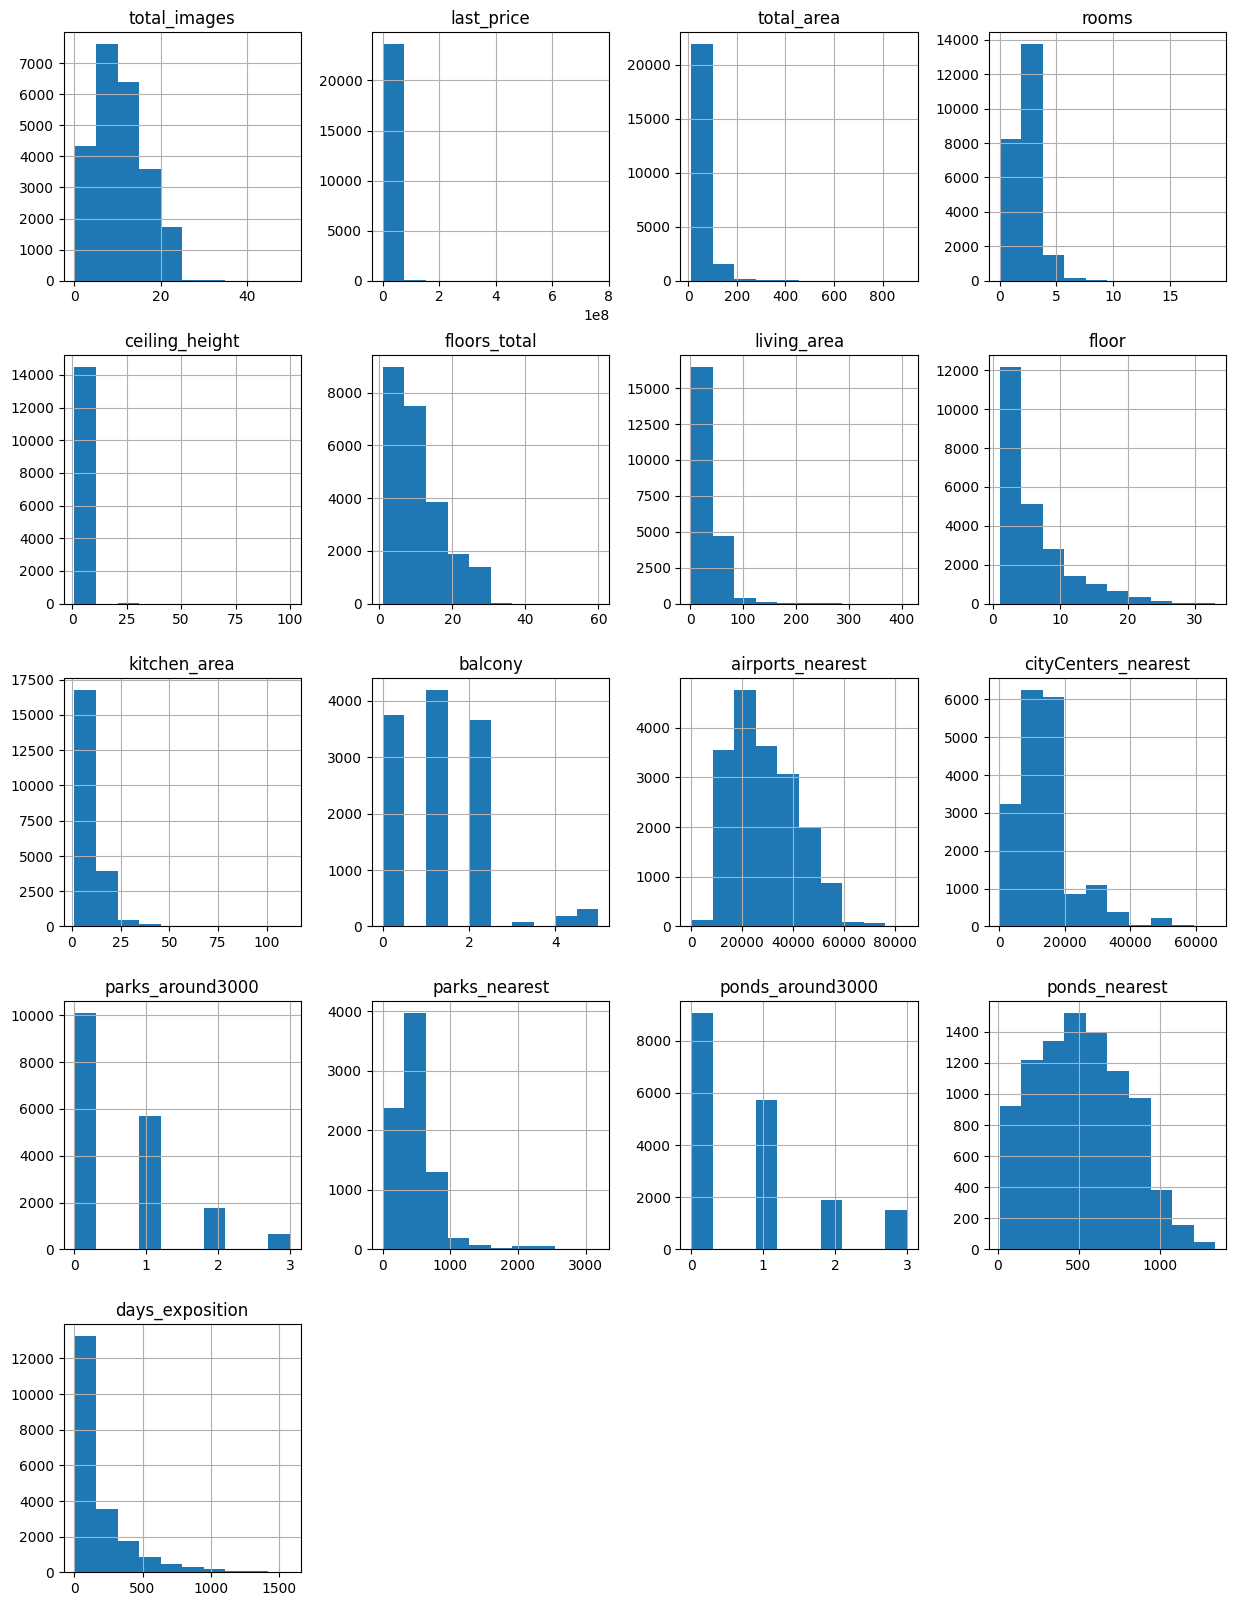

In [5]:
data.hist(figsize=(15, 20));

### Выводы

- Данные успешно прочитаны из .csv файла и сохранены в переменной `data`. Данные представляют собой 22 переменные и 23699 записей. Обнаружено достаточно много пропущенных данных в столбцах `ceiling_height`, `is_apartment`, `balcony`, `parks_nearest`, `ponds_nearest` и др. Далее рассмотрим каждый отдельный столбец данных для обработки пропущенных и недостоверных значений.

### 2. Предобработка данных

In [6]:
# check
# пропущенные значения бары

def pass_value_barh(data):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
            .plt.xlabel('Процент пропусков', fontsize=22)
            .plt.ylabel('Столбцы с пропусками')
            .plt.xlim(0, 100)
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

пропусков не осталось :) или произошла ошибка в первой части функции 


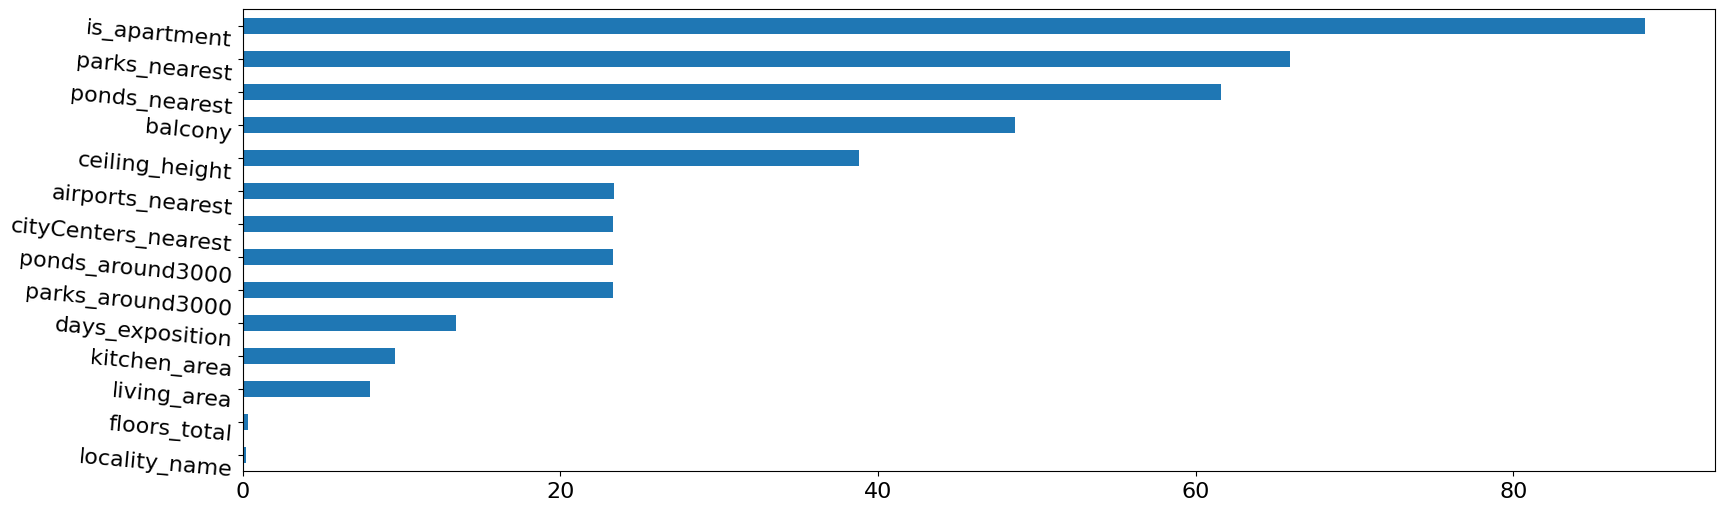

In [7]:
pass_value_barh(data)

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
data['total_images'].value_counts()

total_images
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: count, dtype: int64

In [10]:
len(data.loc[data['total_images'].isna()])

0

In [11]:
data['last_price'] = data['last_price'].astype('int64')
data['last_price'].value_counts()

last_price
4500000     342
3500000     291
4300000     260
4000000     260
4200000     259
           ... 
12890000      1
29375000      1
7545600       1
5205000       1
11475000      1
Name: count, Length: 2978, dtype: int64

In [12]:
len(data.loc[data['last_price'].isna()])

0

In [13]:
data['total_area'].value_counts()

total_area
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
184.40      1
55.64       1
56.16       1
109.10      1
76.75       1
Name: count, Length: 2182, dtype: int64

In [14]:
len(data.loc[data['total_area'].isna()])

0

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='mixed')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [16]:
len(data.loc[data['first_day_exposition'].isna()])

0

In [17]:
data['rooms'].value_counts()

rooms
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: count, dtype: int64

- Колличество комнат не может быть равно 0 (таких значений 197). Скорее всего эти данные не были заполнены, или 0 внесли по ошибке. Взглянем на общую площадь квартир таких объявлений. Построим гистаграмму распределения total_area при rooms = 0.

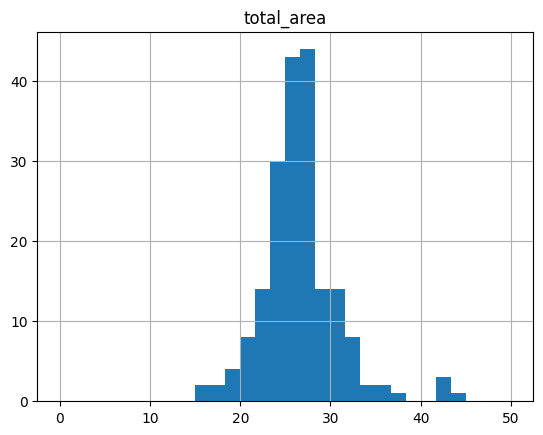

In [18]:
data.loc[data['rooms'] == 0].hist('total_area', bins=30, range=(0, 50));

- Квартиры с площадью меньше 40 м² скорее всего однокомнатные. Заменим значение `rooms` в таких объявлениях на 1.  
В квартирах с большей площадью сложно судить о колличестве комнат. Оставим в таких записях нули и запомним, что колличество комнат в них неизвестно.

In [19]:
data.loc[(data['rooms'] == 0) & (data['total_area'] < 40), 'rooms'] = 1

In [20]:
data['rooms'].value_counts()

rooms
1     8235
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
0        9
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: count, dtype: int64

In [21]:
len(data.loc[data['rooms'].isna()])

0

In [22]:
data['ceiling_height'].value_counts()

ceiling_height
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: count, Length: 183, dtype: int64

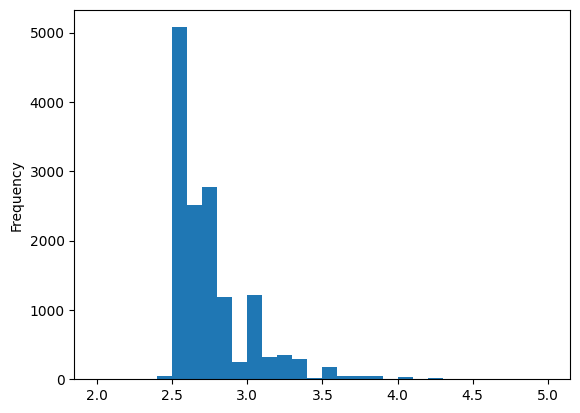

In [23]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5));

In [24]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [25]:
data = data.loc[(data['ceiling_height'].isna()) | ((data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 4.1))]

In [26]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [27]:
len(data.loc[data['ceiling_height'].isna()])

9195

- Пропущено много данных (почти 50%), удалить их нельзя. Составители заявлений могли не внести эти данные, или информация утеряна в результатее сбоя системы при загрузке/выгрузке базы данных.  
Пропуски можно было бы заменить на значения из других объявлений в тех же домах, но информации об адресах квартир в нет.  
Замена значений на средние или медианные может внести искажения в распределение данных. При возможности, необходимо восстановить данные по адресам домов или обратиться к владельцам данных.  
На данном этапе оставим значения пустыми.  
- Устранены аномалии

In [28]:
data['floors_total'].value_counts()

floors_total
5.0     5733
9.0     3748
16.0    1372
12.0    1355
4.0     1191
10.0    1172
25.0    1074
6.0      902
17.0     831
3.0      658
7.0      585
14.0     549
18.0     504
24.0     468
8.0      387
2.0      377
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     123
35.0      24
1.0       23
28.0      21
36.0       2
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
Name: count, dtype: int64

In [29]:
data = data.loc[~(data['floors_total'].isna())]

In [30]:
data['floors_total'] = data['floors_total'].astype('int64')

In [31]:
len(data.loc[data['floors_total'].isna()])

0

In [32]:
data['living_area'].value_counts()

living_area
18.00     879
17.00     669
30.00     593
16.00     483
20.00     478
         ... 
76.70       1
124.90      1
36.07       1
50.81       1
42.55       1
Name: count, Length: 1762, dtype: int64

In [33]:
data['living_area'].describe()

count    21610.000000
mean        34.370021
std         21.679145
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [34]:
len(data.loc[data['living_area'].isna()])

1859

- Пропусков в данном столбце достаточно много (около 8% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при наличии адреса дома, или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

In [35]:
data['floor'].value_counts()

floor
2     3336
3     3052
1     2896
4     2777
5     2594
6     1287
7     1205
8     1071
9     1040
10     684
12     519
11     517
13     375
15     339
14     333
16     315
17     225
18     175
19     143
21     121
22     112
20     108
23      99
24      61
25      46
26      23
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: count, dtype: int64

In [36]:
len(data.loc[data['floor'].isna()])

0

In [37]:
data['is_apartment'].value_counts()

is_apartment
False    2699
True       44
Name: count, dtype: int64

In [38]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [39]:
len(data.loc[data['is_apartment'].isna()])

0

In [40]:
data['studio'].value_counts()

studio
False    23324
True       145
Name: count, dtype: int64

In [41]:
len(data.loc[data['studio'].isna()])

0

In [42]:
data['open_plan'].value_counts()

open_plan
False    23403
True        66
Name: count, dtype: int64

In [43]:
len(data.loc[data['open_plan'].isna()])

0

In [44]:
data['kitchen_area'].value_counts()

kitchen_area
6.00     1290
10.00    1255
8.00     1104
9.00     1094
7.00     1054
         ... 
41.30       1
20.56       1
53.10       1
12.56       1
13.83       1
Name: count, Length: 964, dtype: int64

In [45]:
len(data.loc[data['kitchen_area'].isna()])

2212

- Пропусков в данном столбце достаточно много (порядка 10% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

In [46]:
data['balcony'].value_counts()

balcony
1.0    4156
0.0    3699
2.0    3635
5.0     299
4.0     182
3.0      79
Name: count, dtype: int64

In [47]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [48]:
len(data.loc[data['balcony'].isna()])

0

In [49]:
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                   15564
посёлок Мурино                      518
посёлок Шушары                      439
Всеволожск                          396
Пушкин                              365
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: count, Length: 362, dtype: int64

In [50]:
(data['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [51]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')

In [52]:
# check
data.locality_name.nunique()

320

In [53]:
# check
data.locality_name.unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор'

In [54]:
data[data.duplicated(['total_area', 'rooms', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1376,6,2500000,42.0,2019-03-06,2,NaN,5,29.00,3,False,...,6.00,1,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2395,9,1750000,44.0,2016-06-09,1,NaN,5,18.00,1,False,...,14.00,0,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,22.0
3568,17,4950000,58.0,2018-02-20,3,NaN,9,39.20,4,False,...,6.50,0,Санкт-Петербург,31691.0,12580.0,0.0,NaN,0.0,NaN,264.0
3576,9,5250000,57.1,2015-04-06,3,2.53,9,39.00,8,False,...,6.10,1,Санкт-Петербург,19816.0,11347.0,0.0,NaN,0.0,NaN,508.0
4606,12,2900000,74.0,2017-12-14,3,NaN,5,NaN,4,False,...,NaN,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23516,3,22529250,139.5,2018-07-04,4,3.30,16,82.55,9,False,...,13.84,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0
23541,16,5200000,63.0,2017-10-27,3,2.55,12,41.00,4,False,...,7.00,0,Санкт-Петербург,49631.0,14525.0,2.0,672.0,1.0,172.0,165.0
23548,14,2250000,36.0,2017-10-14,1,2.50,5,17.00,5,False,...,9.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,425.0
23643,1,660000,45.0,2019-02-19,2,NaN,5,31.00,4,False,...,6.00,1,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
len(data.loc[data['locality_name'].isna()])

48

In [56]:
data['locality_name'].fillna('Неизвестно', inplace=True)

- Пропусков в данном столбце немного (49 записей). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены, удаленность от аэропортов и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить при наличии адреса дома, или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. Заменим пропуски на значение `Неизвестно`  
- Были заменены неявные дубликаты

In [57]:
data['airports_nearest'].value_counts()

airports_nearest
37434.0    61
21928.0    32
44870.0    30
39946.0    30
37407.0    27
           ..
23338.0     1
16282.0     1
12655.0     1
23322.0     1
24665.0     1
Name: count, Length: 8239, dtype: int64

In [58]:
len(data.loc[data['airports_nearest'].isna()])

5484

- Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

In [59]:
data['cityCenters_nearest'].value_counts()

cityCenters_nearest
8460.0     61
20802.0    32
10720.0    30
8434.0     27
10364.0    26
           ..
3914.0      1
2647.0      1
1628.0      1
12574.0     1
6263.0      1
Name: count, Length: 7608, dtype: int64

In [60]:
len(data.loc[data['cityCenters_nearest'].isna()])

5464

- Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

In [61]:
data['parks_around3000'].value_counts()

parks_around3000
0.0    10025
1.0     5624
2.0     1720
3.0      637
Name: count, dtype: int64

In [62]:
len(data.loc[data['parks_around3000'].isna()])

5463

- Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
На данном этапе оставим пропуски как есть, так как их слишком много.

In [63]:
data['parks_nearest'].value_counts()

parks_nearest
441.0     67
392.0     41
173.0     41
456.0     40
471.0     31
          ..
808.0      1
767.0      1
870.0      1
868.0      1
2984.0     1
Name: count, Length: 994, dtype: int64

In [64]:
len(data.loc[data['parks_nearest'].isna()])

15484

Пропусков в данном столбце достаточно много (порядка 65% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления (по причине отсутствия парков вблизи квартиры) или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

In [65]:
data['ponds_around3000'].value_counts()

ponds_around3000
0.0    9002
1.0    5648
2.0    1873
3.0    1483
Name: count, dtype: int64

In [66]:
len(data.loc[data['ponds_around3000'].isna()])

5463

- Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
На данном этапе оставим пропуски как есть, так как их слишком много.

In [67]:
data['ponds_nearest'].value_counts()

ponds_nearest
427.0     69
454.0     41
153.0     40
433.0     39
474.0     37
          ..
985.0      1
889.0      1
107.0      1
947.0      1
1134.0     1
Name: count, Length: 1096, dtype: int64

In [68]:
len(data.loc[data['ponds_nearest'].isna()])

14465

- Пропусков в данном столбце достаточно много (около 60% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).    
Данные могли не внести составители заявления (по причине отсутствия парков вблизи квартиры) или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных.   
Данные невозможно восстановить на основе имеющейся информации. На данном этапе оставим пропуски как есть.  

In [69]:
data['days_exposition'].value_counts()

days_exposition
45.0      873
60.0      537
7.0       233
30.0      207
90.0      201
         ... 
793.0       1
1434.0      1
1231.0      1
739.0       1
971.0       1
Name: count, Length: 1138, dtype: int64

In [70]:
len(data.loc[data['days_exposition'].isna()])

3148

- Пропусков в данном столбце достаточно много (порядка 13% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд.).  
Данные могли быть утеряны в результате сбоя системы при выгрузке базы.  
Также возможно информация не была внесена системой, так как объявление не было снято в момент выгрузки данных.    
Информацию можно восстановить при обращении к владельцам данных.   
На данном этапе предположим, что объявления с пропусками не были сняты и оставим их как есть.  

In [71]:
data = data.reset_index(drop=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23469 entries, 0 to 23468
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23469 non-null  int64         
 1   last_price            23469 non-null  int64         
 2   total_area            23469 non-null  float64       
 3   first_day_exposition  23469 non-null  datetime64[ns]
 4   rooms                 23469 non-null  int64         
 5   ceiling_height        14351 non-null  float64       
 6   floors_total          23469 non-null  int64         
 7   living_area           21610 non-null  float64       
 8   floor                 23469 non-null  int64         
 9   is_apartment          23469 non-null  bool          
 10  studio                23469 non-null  bool          
 11  open_plan             23469 non-null  bool          
 12  kitchen_area          21257 non-null  float64       
 13  balcony         

In [73]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Найдите и устраните редкие и выбивающиеся значения.

In [74]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([ 0.01, .99,]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.010000,1.00,25.39,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.990000,5.00,193.49,3.66,"1,066.80","35,000,000.00",117.39,35.00,23.00,26.00


In [75]:
data = data.loc[(data['rooms'].isna()) | ((data['rooms'] >= 1) & (data['rooms'] <= 5))]

In [76]:
data = data.loc[(data['total_area'].isna()) | ((data['total_area'] >= 25.39) & (data['total_area'] <= 193.49))]

In [77]:
data = data.loc[(data['ceiling_height'].isna()) | ((data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 3.66))]

In [78]:
data = data.loc[(data['days_exposition'].isna()) | ((data['days_exposition'] >= 4.00) & (data['days_exposition'] <= 1066.80))]

In [79]:
data = data.loc[(data['last_price'].isna()) | ((data['last_price'] >= 1000000) & (data['last_price'] <= 35000000))]

In [80]:
data = data.loc[(data['living_area'].isna()) | ((data['living_area'] >= 13) & (data['living_area'] <= 117.39))]

In [81]:
data = data.loc[(data['kitchen_area'].isna()) | ((data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 35))]

In [82]:
data = data.loc[(data['kitchen_area'].isna()) | ((data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 35))]

In [83]:
data = data.loc[(data['floor'].isna()) | ((data['floor'] >= 1) & (data['floor'] <= 23))]

In [84]:
data = data.loc[(data['floors_total'].isna()) | ((data['floors_total'] >= 2) & (data['floors_total'] <= 26))]

### Выводы

- Данные в таблице содержат больщое колличество пропусков (до 65% в столбце).  
- Пропуски были проанализированы и по возможности заполнены (например пропущенные значения в колличестве балконов заменены на 0).  
- Возможные причины пропусков приведены для каждой переменной. Основными причинами являются отсутствие информации при заполнении объявления и сбои в работе системы при загрузке/выгрузке базы данных.  
- Дополнительно был проанализирован столбец `rooms`. Нулевые значения были заменены на 1 (1-комнатная квартира) при общей площади квартиры `total_area` < 40 м²  
- Типы данных были преобразованы в соответствии с описанием таблицы и смыслом хранимой информации.

### 3. Посчитайте и добавьте в таблицу новые столбцы

In [85]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [86]:
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

In [87]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [88]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [89]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [90]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_cat'] = data.apply(floor_category, axis=1)

In [91]:
data['airports_nearest'] = round(data['airports_nearest'] / 1000, 0)

In [92]:
data['cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000, 0)

In [93]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_cat
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018,другой
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,False,...,0.0,NaN,0.0,NaN,NaN,110544,3,4,2019,другой


### Выводы

- Метрики были успешно посчитаны, исходя из условия задания, и добавлены в основную таблицу.  
- Названия для новых столбцов выбраны, исходя из информации, которая в них хранится.  
- В новых столбцах есть пропущенные значения в тех записях, где были пропуски исходных данных.  

### 4. Проведите исследовательский анализ данных

#### 4.1 Изучите следующие параметры объектов:

Общая площадь

count    21403.000000
mean        57.279642
std         23.651129
min         25.410000
25%         40.400000
50%         52.000000
75%         68.000000
max        193.200000
Name: total_area, dtype: float64

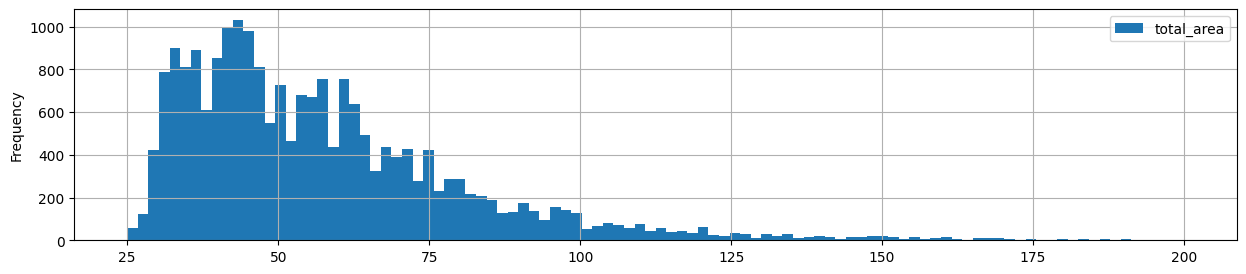

In [94]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,3), range = (25,200))
data['total_area'].describe()

- Распределение значений близко к распределению Пуассона, без аномальных пиков.

Жилая площадь

count    19732.000000
mean        32.837396
std         15.711261
min         13.000000
25%         18.900000
50%         30.000000
75%         42.000000
max        117.100000
Name: living_area, dtype: float64

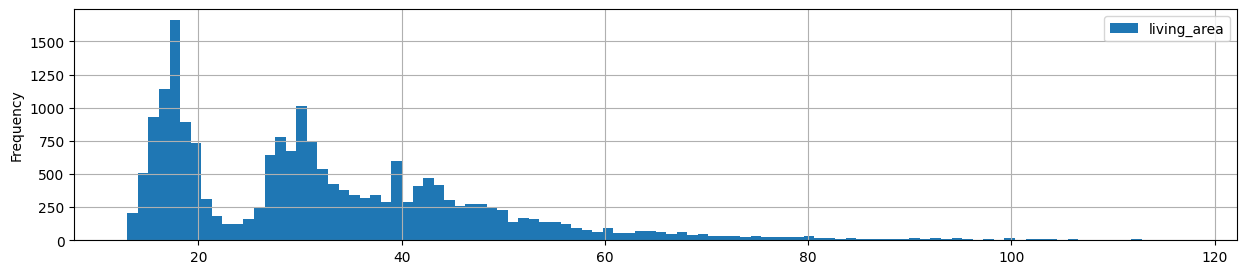

In [95]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (15,3), range = (13,117))
data['living_area'].describe()

- Видим провал в районе 25 кв. метров, это связано с тем, что мало таких больших однушек и таких маленьких двушек.


Площадь кухни

count    19534.000000
mean        10.013772
std          4.194623
min          5.000000
25%          7.000000
50%          9.000000
75%         11.500000
max         35.000000
Name: kitchen_area, dtype: float64

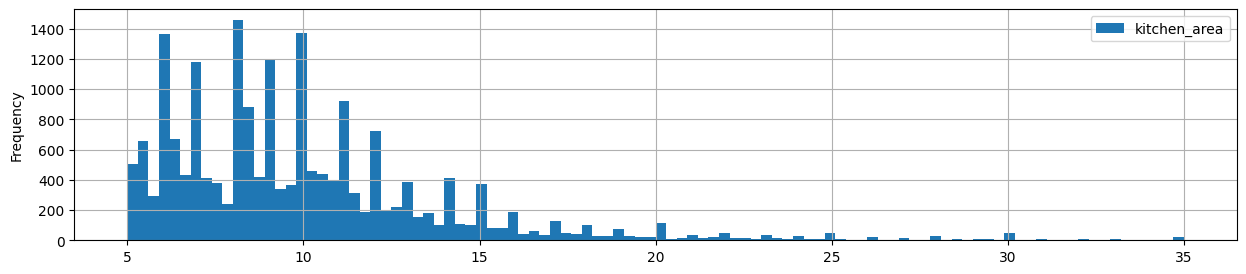

In [96]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (15,3), range = (5,35))
data['kitchen_area'].describe()

- Есть выбивающиеся значения, возможно это связано с тем, что много типовых домов.

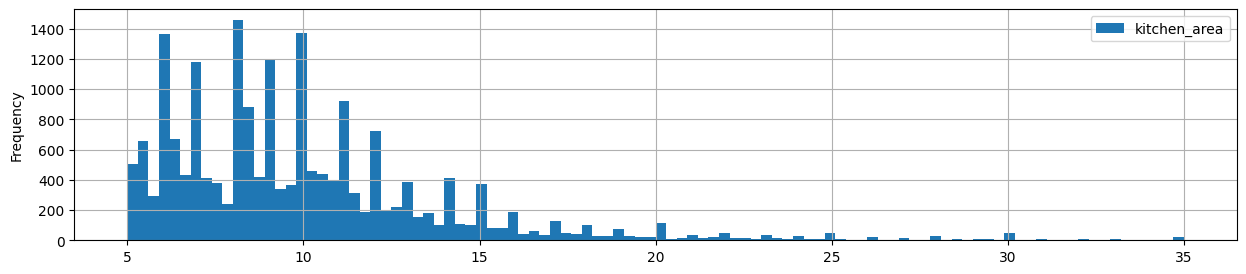

In [128]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (15,3), range = (5,35));

Цена объекта

count    2.140300e+04
mean     5.664442e+06
std      3.827467e+06
min      1.000000e+06
25%      3.490000e+06
50%      4.600000e+06
75%      6.550000e+06
max      3.500000e+07
Name: last_price, dtype: float64

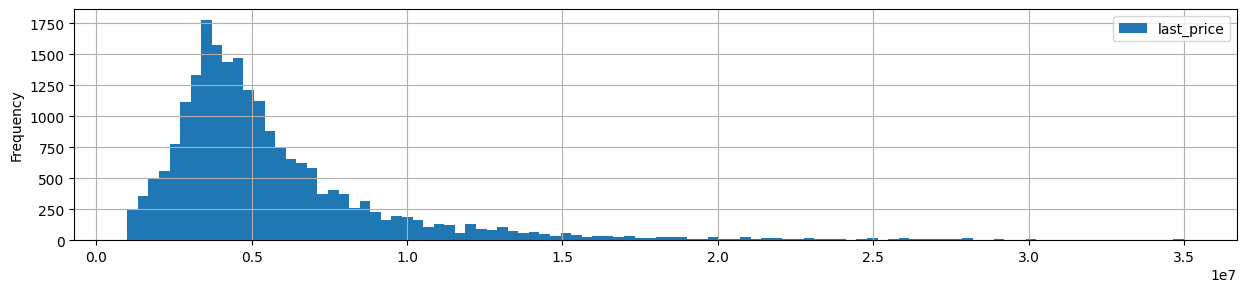

In [98]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (15,3), range = (1000000,35000000))
data['last_price'].describe()

- Распределение значений близко к распределению Пуассона, без аномальных пиков.

Количество комнат

count    21403.000000
mean         2.033453
std          0.935047
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

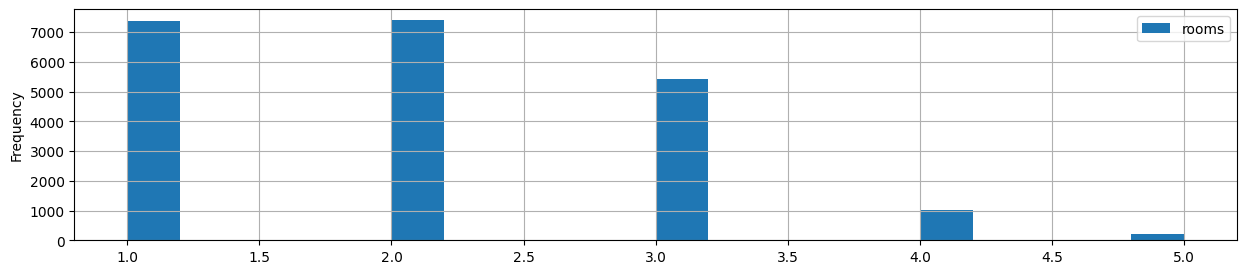

In [99]:
data.plot(y = 'rooms', kind = 'hist', grid=True, bins = 20, figsize = (15,3))
data['rooms'].describe()

- Распределение без аномальных пиков.

Высота потолков

count    13165.000000
mean         2.700836
std          0.222259
min          2.500000
25%          2.500000
50%          2.650000
75%          2.800000
max          3.660000
Name: ceiling_height, dtype: float64

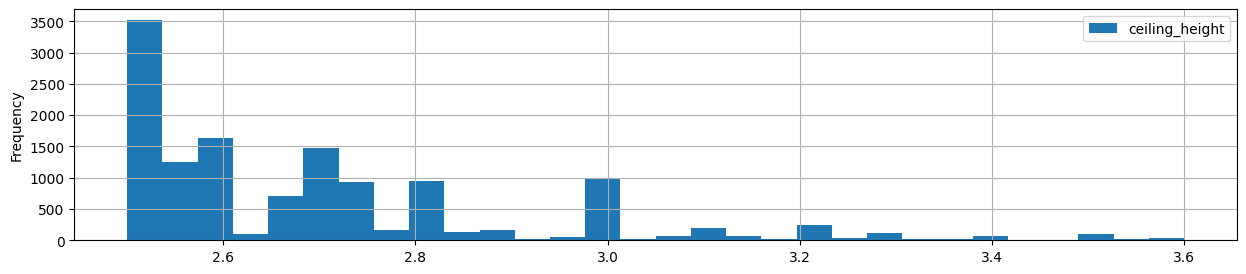

In [100]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (15,3), range = (2.5,3.6))
data['ceiling_height'].describe()

- Распределение без аномальных пиков.

Этаж квартиры

count    21403.000000
mean         5.756529
std          4.597724
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         23.000000
Name: floor, dtype: float64

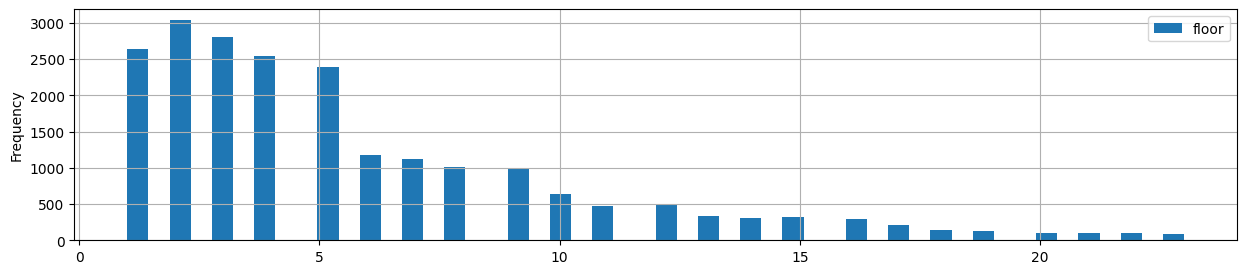

In [101]:
data.plot(y = 'floor', kind = 'hist', bins = 50, grid=True, figsize = (15,3), range = (1,23))
data['floor'].describe()

- Распределение значений близко к распределению Пуассона, без аномальных пиков.

Тип этажа квартиры («первый», «последний», «другой»)

count      21403
unique         3
top       другой
freq       15871
Name: floor_cat, dtype: object

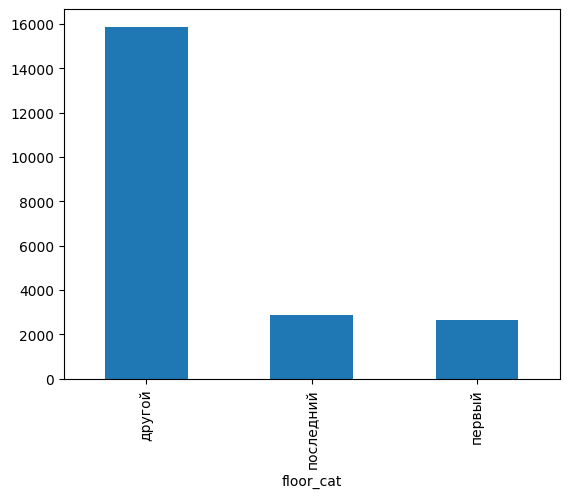

In [102]:
data['floor_cat'].value_counts().plot.bar()
data['floor_cat'].describe()

Общее количество этажей в доме

count    21403.000000
mean        10.605616
std          6.326779
min          2.000000
25%          5.000000
50%          9.000000
75%         15.500000
max         26.000000
Name: floors_total, dtype: float64

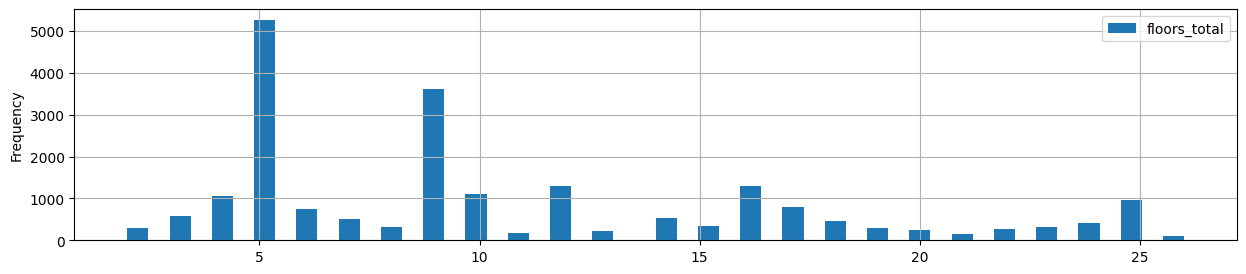

In [103]:
data.plot(y = 'floors_total', kind = 'hist', bins = 50, grid=True, figsize = (15,3), range = (2,26))
data['floors_total'].describe()

- Опять видим, что основная масса квартир продаются в типовых домах

Расстояние до центра города

count    16521.000000
mean        14.439622
std          8.527331
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

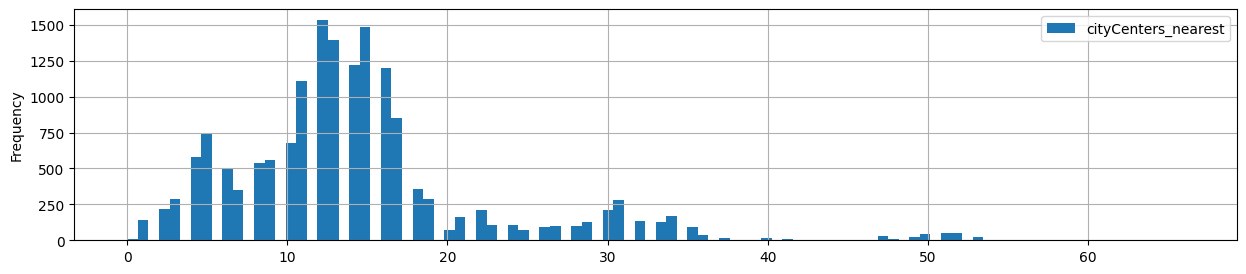

In [104]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (15,3), range = (0,66))
data['cityCenters_nearest'].describe()

- Видим, что основная часть квартир продается в радиусе 15 км от центра.

Расстояние до ближайшего аэропорта

count    16501.000000
mean        28.804375
std         12.673849
min          0.000000
25%         18.000000
50%         27.000000
75%         37.000000
max         85.000000
Name: airports_nearest, dtype: float64

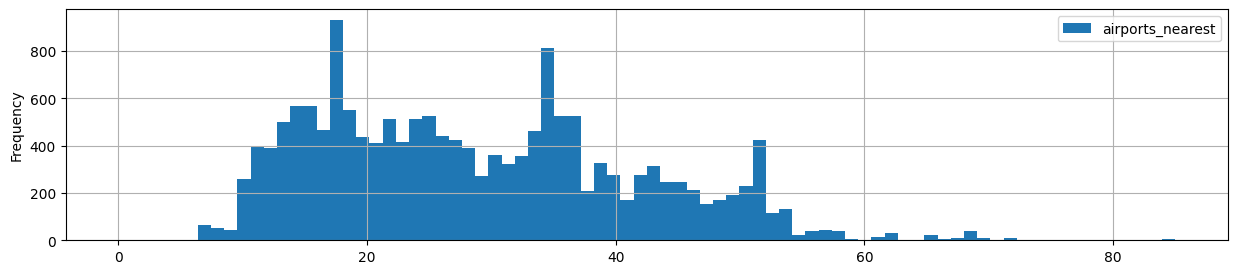

In [105]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 80, grid=True, figsize = (15,3), range = (0,85))
data['airports_nearest'].describe()

Расстояние до ближайшего парка

count    7229.000000
mean      493.276525
std       339.443350
min         1.000000
25%       291.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

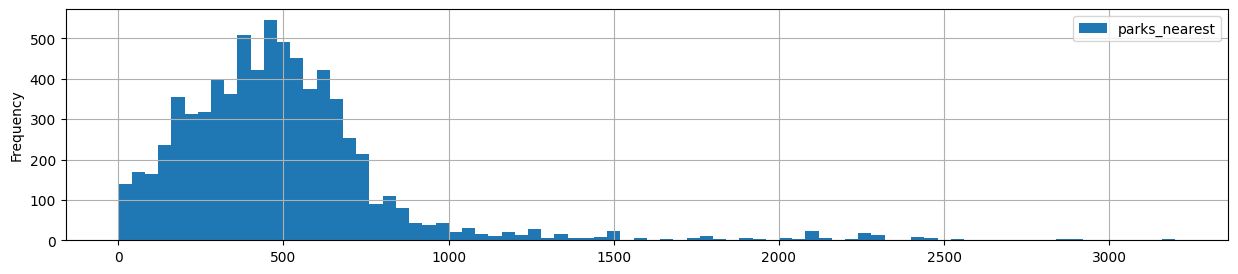

In [106]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 80, grid=True, figsize = (15,3), range = (1,3200))
data['parks_nearest'].describe()

Год публикации объявления

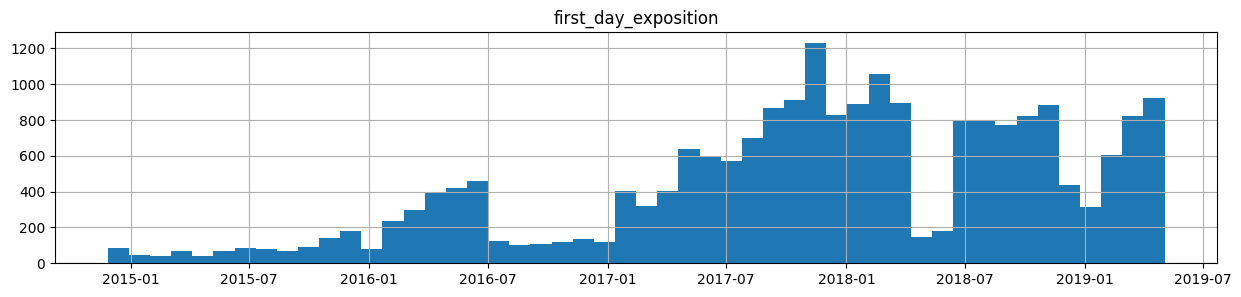

In [107]:
data.hist('first_day_exposition', bins=50, figsize = (15,3));

День публикации объявления

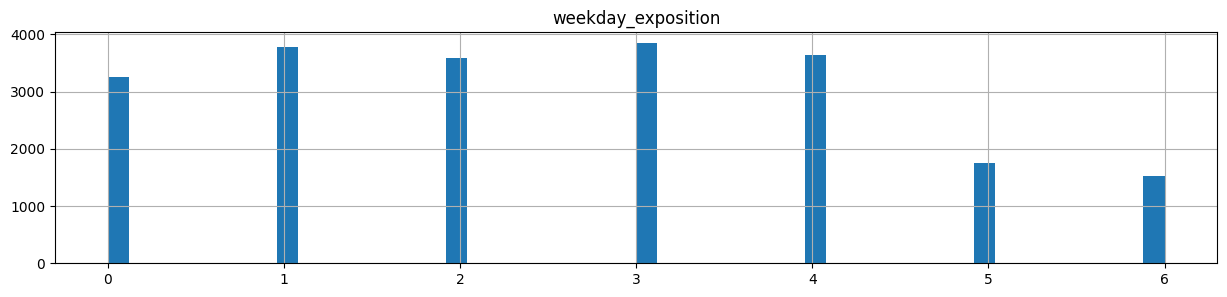

In [108]:
data.hist('weekday_exposition', bins=50, figsize = (15,3));

Месяц публикации объявления

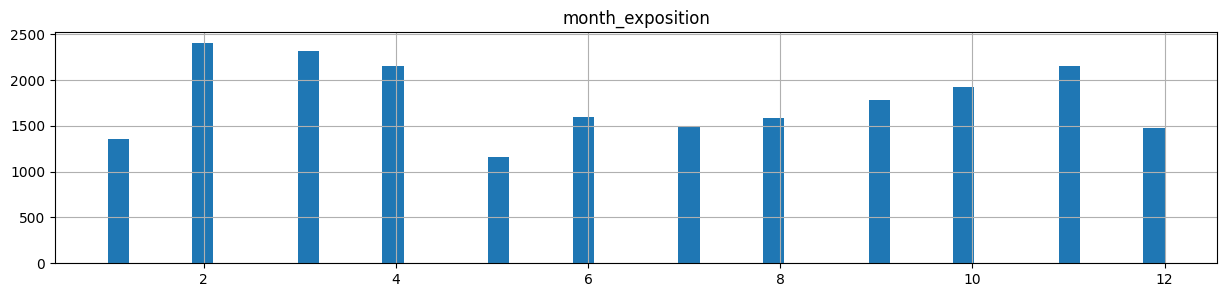

In [109]:
data.hist('month_exposition', bins=50, figsize = (15,3));

#### 4.2 Изучите, как быстро продавались квартиры

Среднее значение времени продажи: 170.0
Медианное значение времени продажи: 94.0


count    18565.000000
mean       170.192243
std        192.882044
min          4.000000
25%         45.000000
50%         94.000000
75%        223.000000
max       1066.000000
Name: days_exposition, dtype: float64

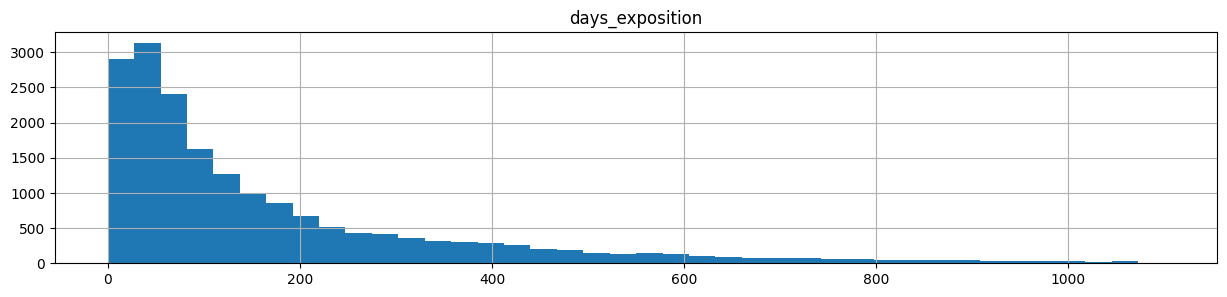

In [110]:
data.hist('days_exposition', bins=40, range=(0,1100), figsize = (15,3));
print('Среднее значение времени продажи:', round(data['days_exposition'].mean(),0));
print('Медианное значение времени продажи:', round(data['days_exposition'].median(),0));
data['days_exposition'].describe()

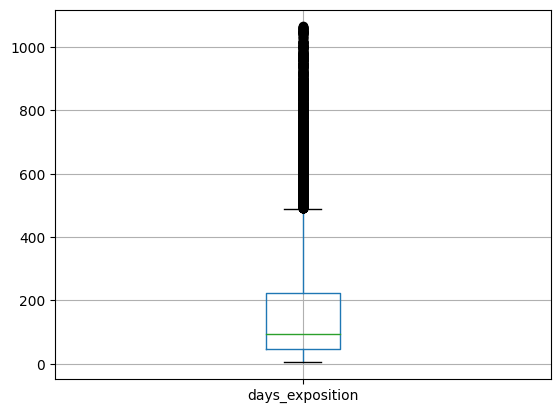

In [111]:
data.boxplot('days_exposition');

- Можно оценить, что верхняя граница, после которой данные можно считать выбросами, находится в районе 500 дней. Но выбросы очень большие (до 1600 дней), поэтому график не очень информативен. Рассчитаем верхнюю границу вручную.  
75%Q + 1.5 \* МКР = 223 + 1.5\*(223 - 45) = 490  
- Время продажи квартиры больше **490 дней** можно считать необычно долгим.

- Среднее значение в 2 раза больше медианного. Данные сильно смещены влево.  
- Это означает, что большинство квартир проданы за сравнительно небольшой срок (45 - 223 дней), но есть очень долгие объявления, вносящие смещение в данные.  

Продажи по годам

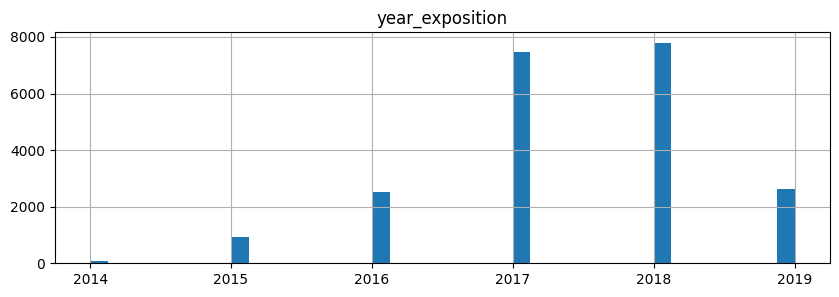

In [112]:
data.hist('year_exposition', bins=40, figsize = (10,3));

### 4.3 Изучите, зависит ли цена от:

Общей площади

0.7669348441430983

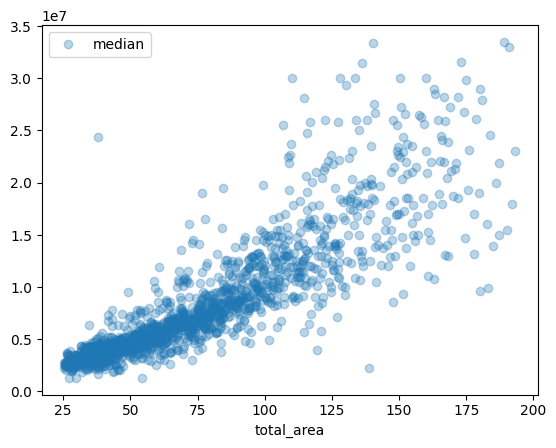

In [113]:
pivot_table_total_area = data.pivot_table(index = 'total_area', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.3)

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

- По графику видно, что в среднем стоимость квартиры растёт с увеличением общей площади.  
- Коэффициент корреляции Пирсона 0.76 также подтверждает положительную зависимость. Значение коэффициента не очень высокое, зависимость между параметрами достаточно слабая. 

Жилой площади

0.6575077373437472

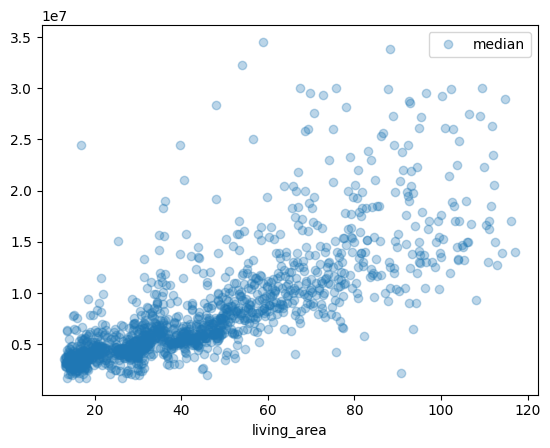

In [114]:
pivot_table_total_area = data.pivot_table(index = 'living_area', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.3)

pivot_table_total_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

- По графику видно, что в среднем стоимость квартиры растёт с увеличением жилой площади.  
- Коэффициент корреляции Пирсона 0.65 также подтверждает положительную зависимость. Значение коэффициента не очень высокое, зависимость между параметрами достаточно слабая. 

Площади кухни

0.5738920179972494

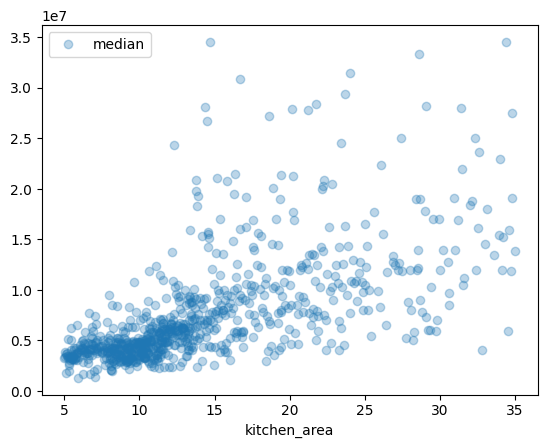

In [115]:
pivot_table_total_area = data.pivot_table(index = 'kitchen_area', 
                                          values = 'last_price', 
                                          aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha = 0.3)

pivot_table_total_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

- По графику видно, что в среднем стоимость квартиры растёт с увеличением площади кухни.  
- Коэффициент корреляции Пирсона 0.57 также подтверждает положительную зависимость. Значение коэффициента не очень высокое, зависимость между параметрами достаточно слабая. 

Этажа, на котором расположена квартира

,mean,count,median
floor_cat,,,
другой,5.898354e+06,15871,4800000.0
первый,4.555342e+06,2634,3970000.0
последний,5.391483e+06,2898,4300000.0


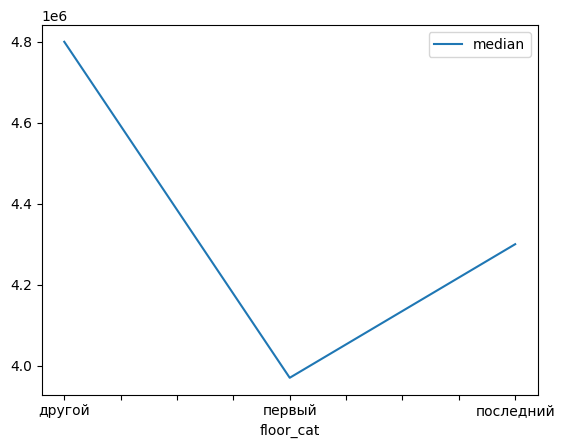

In [116]:
pivot_table_floor_cat = data.pivot_table(index = 'floor_cat', 
                                         values = 'last_price', 
                                         aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_cat.columns = ['mean', 'count', 'median']
pivot_table_floor_cat.plot(y = 'median')
pivot_table_floor_cat

- Как правило квартиры на первом и последнем этаже дешевле квартир на других этажах

Дня размещения

,mean,count,median
weekday_exposition,,,
1,5.687086e+06,3789,4700000.0
2,5.759860e+06,3591,4700000.0
0,5.700016e+06,3264,4600000.0
3,5.684832e+06,3846,4600000.0
5,5.557695e+06,1758,4600000.0
4,5.589336e+06,3634,4550000.0
6,5.557687e+06,1521,4500000.0


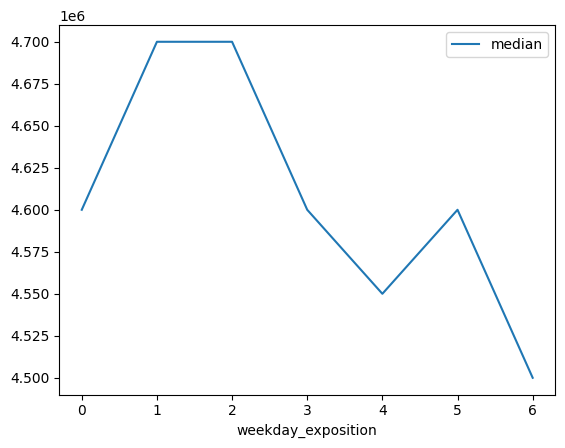

In [117]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', 
                                                  values = 'last_price', 
                                                  aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

- Из графика видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! По субботам стоимость самая низкая!

- Возможно, что в рабочие дни мы видим более высокие цены из-за активности риэлторов.

Месяца размещения

,mean,count,median
month_exposition,,,
4,5.677364e+06,2153,4775000.0
9,5.839433e+06,1780,4694500.0
11,5.732290e+06,2153,4690000.0
7,5.629436e+06,1501,4650000.0
12,5.634695e+06,1477,4650000.0
2,5.673397e+06,2402,4615000.0
3,5.621972e+06,2317,4610000.0
1,5.704486e+06,1353,4600000.0
10,5.581166e+06,1928,4560000.0


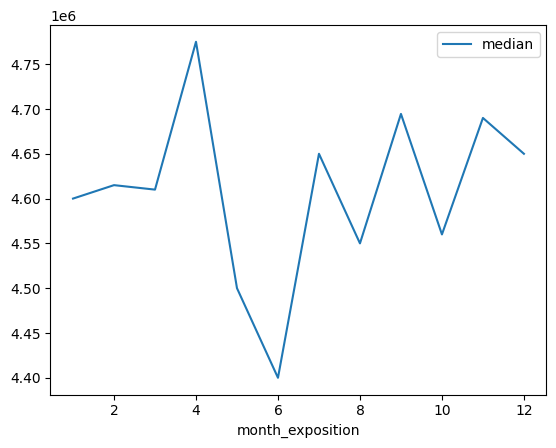

In [118]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', 
                                                  values = 'last_price', 
                                                  aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

- Из графика видно, что выгоднее всего покупать квартиру в начале лета.

Года размещения

,mean,count,median
year_exposition,,,
2014,9.184925e+06,87,7265000.0
2019,5.951923e+06,2610,5046000.0
2015,6.225935e+06,931,5000000.0
2018,5.563209e+06,7776,4600000.0
2016,5.706247e+06,2526,4500000.0
2017,5.544307e+06,7473,4500000.0


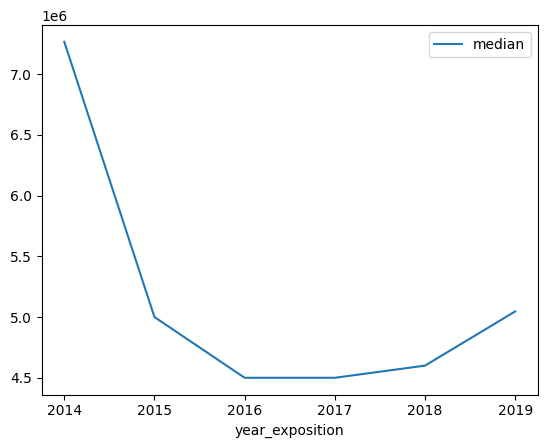

In [119]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', 
                                                  values = 'last_price', 
                                                  aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

- Построим сводные таблицы и исследуем взаимное влияние параметров: кол-во записей и изменение средней цены и средней площади в течение лет.

Цена по годам

In [120]:
years = (data
              .groupby('year_exposition')['last_price']
              .agg(['count', 'mean'])
              .sort_values(by='count', ascending=False)
              .head(6)
             )
years.head(6)

,count,mean
year_exposition,,
2018,7776,5.563209e+06
2017,7473,5.544307e+06
2019,2610,5.951923e+06
2016,2526,5.706247e+06
2015,931,6.225935e+06
2014,87,9.184925e+06


Площадь по годам

In [121]:
total = (data
              .groupby('year_exposition')['total_area']
              .agg(['count', 'mean'])
              .sort_values(by='count', ascending=False)
              .head(6)
             )
total.head(6)

,count,mean
year_exposition,,
2018,7776,56.185522
2017,7473,57.196437
2019,2610,56.294437
2016,2526,58.920226
2015,931,63.249968
2014,87,80.251724


#### Вывод

- Проведя исследования, мы видим, что с увеличением площади цена повышается.
- На первый взгляд кажется, что с 2014 года недвижимость подешевела, но проведя дополнительгые исследования видим, что это не так. В 2014 и 2015 году было подано мало объявлений и они были с большой площадью. Что естественно вводит в заблуждение на первый взгляд. Начиная с 2016 года цена примерно одинаковая.

#### 4.4 Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21403 entries, 0 to 23467
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21403 non-null  int64         
 1   last_price              21403 non-null  int64         
 2   total_area              21403 non-null  float64       
 3   first_day_exposition    21403 non-null  datetime64[ns]
 4   rooms                   21403 non-null  int64         
 5   ceiling_height          13165 non-null  float64       
 6   floors_total            21403 non-null  int64         
 7   living_area             19732 non-null  float64       
 8   floor                   21403 non-null  int64         
 9   is_apartment            21403 non-null  bool          
 10  studio                  21403 non-null  bool          
 11  open_plan               21403 non-null  bool          
 12  kitchen_area            19534 non-null  float64    

In [123]:
localities = (data
              .groupby('locality_name')['price_per_square_meter']
              .agg(['count', 'mean'])
              .sort_values(by='count', ascending=False)
              .head(10)
             )
localities.head(10)

,count,mean
locality_name,,
Санкт-Петербург,14267,110184.813486
поселок Мурино,417,84393.623501
поселок Шушары,411,77979.019465
Всеволожск,385,68660.987013
Пушкин,343,102839.023324
Колпино,327,75285.892966
Гатчина,295,69028.494915
деревня Кудрово,261,92060.256705
поселок Парголово,245,88721.787755


In [124]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)

price_max = locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]
print('Саммая высокая стоимость:', round(price_max['mean'], 1))

price_min = locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]
print('Саммая низкая стоимость:', round(price_min['mean'], 1))

Саммая высокая стоимость: locality_name
Санкт-Петербург    110184.8
Name: mean, dtype: float64
Саммая низкая стоимость: locality_name
Выборг    58416.2
Name: mean, dtype: float64


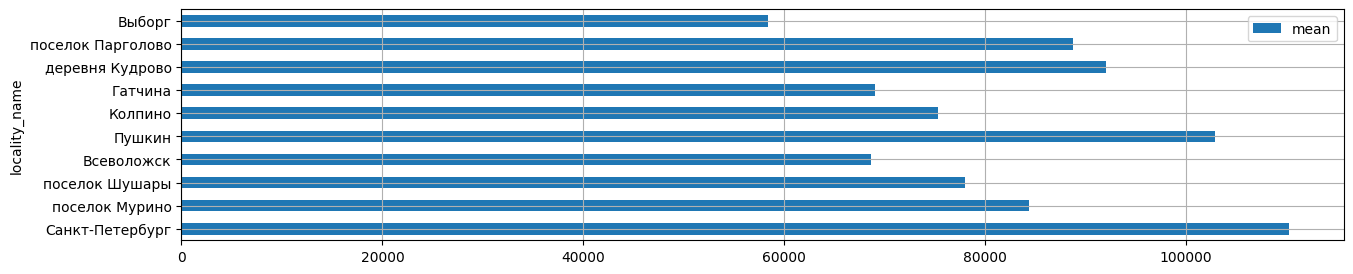

In [125]:
localities.plot(y = 'mean', figsize = (15,3), grid = True, kind='barh');              

- Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

#### 4.5 Как стоимость объектов зависит от расстояния до центра города

,last_price
cityCenters_nearest,
0,1.218991e+07
1,1.124218e+07
2,1.022024e+07
3,9.415749e+06
4,1.003303e+07
5,1.046263e+07
6,9.773000e+06
7,9.693572e+06
8,8.680807e+06


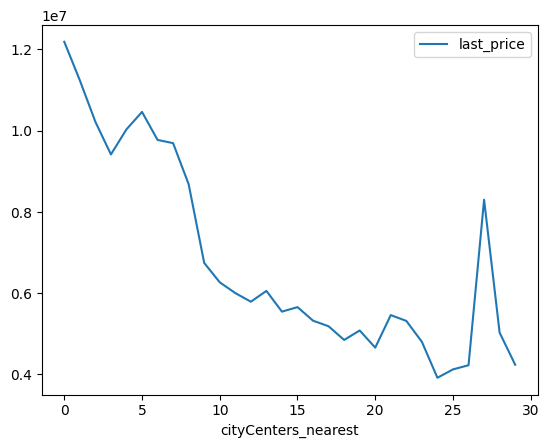

In [126]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(999999)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest !=999999'
                           ).pivot_table(index = 'cityCenters_nearest', 
                            values = 'last_price', 
                            aggfunc = 'mean')
                    
pivot_table_km.plot()
pivot_table_km

- В принципе зависимость логичная, чем дальше от центра, тем квартиры дешевле. Только на расстоянии 3, 5 и 27 километров есть странные пики.

### Общий вывод

1) Данные в таблице real_estate_data.csv о продаже квартир содержат много пропущенной информации (от 5 до 65 % пропусков в различных столбцах). Часть информации могла быть утеряна в результате сбоев системы при загрузке/выгрузке данных. Часть информации могла отсутствовать изначально (объявления не были заполнены на 100%). Информация была восстановлена по существующим данным из других параметров, или оставлениа как есть.
2) Аномальные/неправдоподобные данные были частично исправлены, исходя из данных таблицы. Небольшие выбросы (до 1%), не влияющие на общее распределение данных, были удалены. Также типы данных были исправлены, логики хранящейся информации.
3) Дополнитеьные параметры (цена квадратного метра, год публикации, категории этажа квартиры и тд) были рассчитаны добавлены в исходную таблицу для дальнейших исследований.
4) Распределения параметров квартир: площадь, цена, число комнат, высота потолков, близки к Пуассоновскому. Аномальных пиков после преобразования данных не замечено.
5) Время продажи квартир имеет достаточно большой разброс: 45 - 223 дней. Выбросами можно считать время меньше 4 дней или больше 490. Это может говорить о нестабильности рынка недвижимости.
6) На стоимость квартиры больше всего влияют параметры: общая площадь, этажа, удалённость от центра.
7) Проанализирована стоимость квадратного метра в различных районах. Самым дорогим оказался Санкт-Петербург (110184.8), самая дешёвая стоимость квадратного метра в Выборге (58416.2).